<a href="https://colab.research.google.com/github/danavanwyk/Data-Analytics/blob/main/EDA_ON_GOT_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I have stumbled upon a cool Data Set on the Battles and death in the Game Of Thrones saga. 

To keep our skills sharpened i will be doing some Exploratory Data Analisys on the Data Set provided. 

AS always let's import our packages. 

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
battle = pd.read_csv('battles.csv')

Let's take a peak at the Data set battles.csv

In [ ]:
battle.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [ ]:
battle.shape

(38, 25)

We can see that the column names are not very descriptive. Or maybe i just don't like them. Lets's rename attacker_1 to primary attacker, and the same for defender_1


In [ ]:
battle.rename(columns={'attacker_1':'primary_attacker'}, inplace=True)
battle.head()

In [8]:
battle.rename(columns={'defender_1':'primary_defender'}, inplace=True)
battle.head()

,name,year,battle_number,attacker_king,defender_king,primary_attacker,attacker_2,attacker_3,attacker_4,primary_defender,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


I want to take a look at the Kings who have been the most active. So if we count the nuber of attacks in hte attacker_king column we should get a good idea. 

We can use value_counts() to do this. From this we can see that Joffrey/Tommen Baratheon are the trouble makers and we can plot this now. 

In [9]:
battle['attacker_king'].value_counts()

Joffrey/Tommen Baratheon    14
Robb Stark                  10
Balon/Euron Greyjoy          7
Stannis Baratheon            5
Name: attacker_king, dtype: int64

In [45]:
battle['location'].value_counts()



Riverrun                                3
Winterfell                              3
Storm's End                             2
Harrenhal                               2
Darry                                   2
Moat Cailin                             2
Deepwood Motte                          2
Torrhen's Square                        2
Golden Tooth                            1
Seagard                                 1
Castle Black                            1
Shield Islands                          1
Saltpans                                1
Ruby Ford                               1
Ryamsport, Vinetown, Starfish Harbor    1
Dragonstone                             1
The Twins                               1
Red Fork                                1
Duskendale                              1
King's Landing                          1
Crag                                    1
Mummer's Ford                           1
Oxcross                                 1
Stony Shore                       

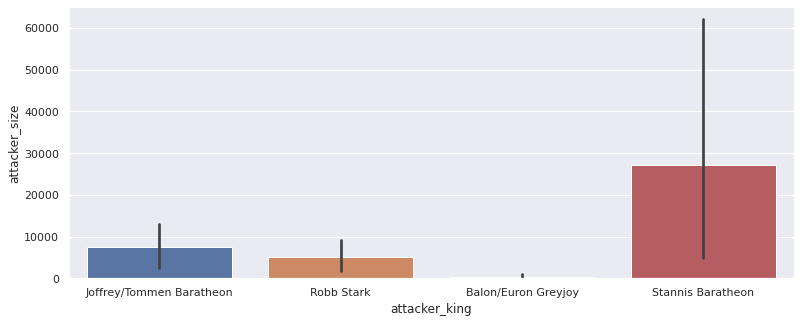

In [18]:
sns.set(rc={'figure.figsize':(13,5)})
sns.barplot(x='attacker_king', y='attacker_size', data=battle)
plt.show()

From the viz above it is easy to conclude that Stannis Borathean Attack more often that anyone and that his army is also the biggest of all.

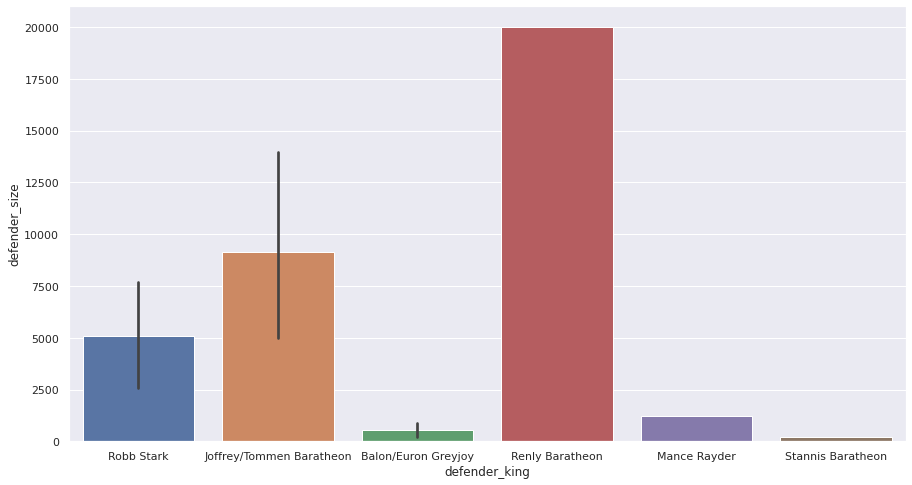

In [24]:
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x='defender_king', y='defender_size', data=battle)
plt.show()

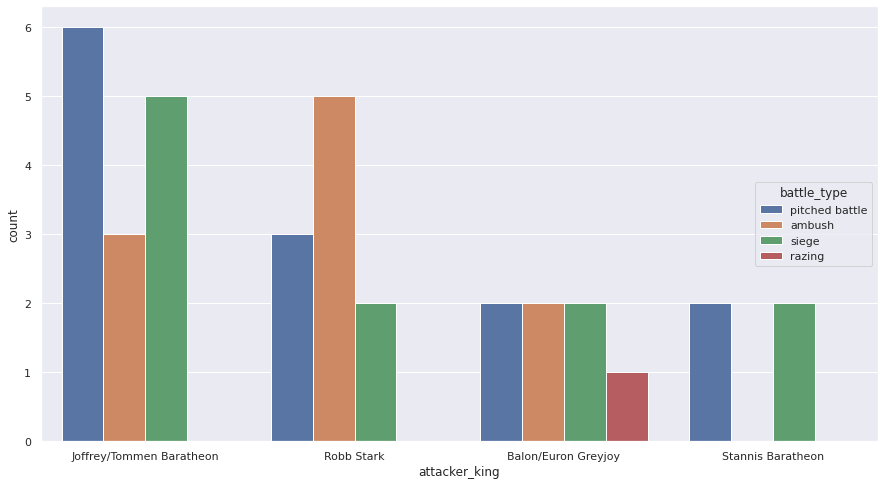

In [36]:
ax = sns.countplot(x=battle['attacker_king'], hue=battle['battle_type'])
sns.move_legend(ax, 'center right')
plt.show()

As we know thers was a lot of people that died in the Game of Trones Saga. Lets take a visual look at this.

In [46]:
#We have a seperate Data Set containing only the deaths. 
deaths = pd.read_csv('character-deaths.csv')

In [48]:
deaths.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [50]:
deaths.describe()

,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
count,305.000000,307.000000,299.000000,905.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,299.157377,2.928339,40.070234,28.861878,0.828790,0.468920,0.272628,0.353326,0.424209,0.272628,0.284624
std,0.703483,1.326482,20.470270,20.165788,0.376898,0.499305,0.445554,0.478264,0.494492,0.445554,0.451481
min,297.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,299.000000,2.000000,25.500000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,299.000000,3.000000,39.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,300.000000,4.000000,57.000000,43.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,300.000000,5.000000,80.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
deaths.shape

(917, 13)

In [54]:
deaths['Gender'].value_counts()

1    760
0    157
Name: Gender, dtype: int64

In [55]:
deaths['Nobility'].value_counts()

0    487
1    430
Name: Nobility, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

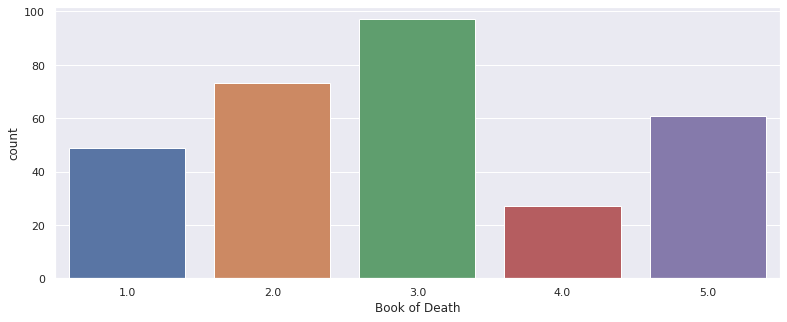

In [62]:
sns.countplot(deaths['Book of Death'])
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

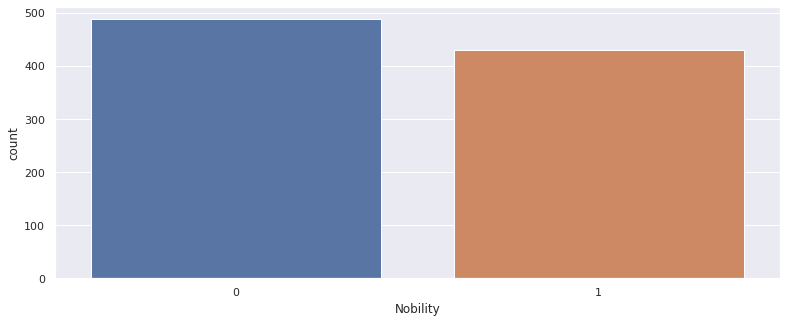

In [61]:
sns.countplot(deaths['Nobility'])
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

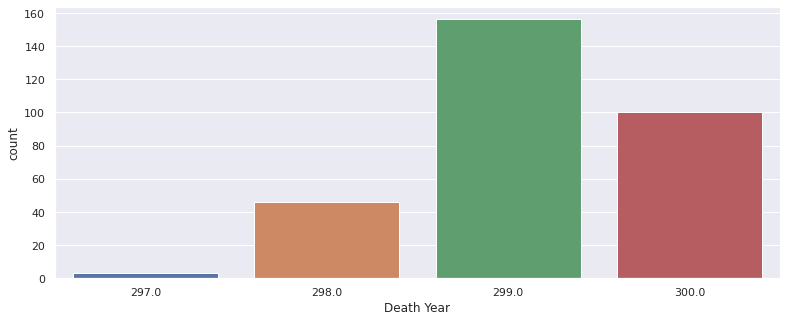

In [60]:
sns.countplot(deaths['Death Year'])
plt.show